In [1]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from utils.dataset import BrainMRISliceDataset
from utils.utils import train, validate
from utils.vis import plot_mri

## Constants

In [2]:
ROOT_DIR = '../Data/'
BATCH_SIZE = 1
DEVICE = 'mps' if torch.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

## Transforms

In [3]:
train_transform = transforms.Compose([
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.ToTensor()
])

In [4]:
train_dataset = BrainMRISliceDataset(os.path.join(ROOT_DIR, 'train'), slice_axis=2, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

test_dataset = BrainMRISliceDataset(os.path.join(ROOT_DIR, 'val'), slice_axis=2, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

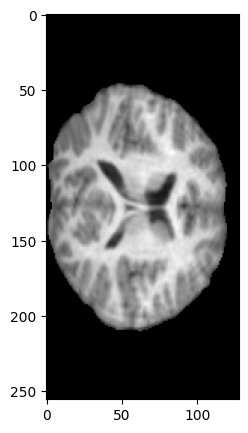

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(train_dataset[150][0].squeeze().numpy(), cmap='gray')

## Models

## Loss & Optimizer